In [68]:
import graphlab
import random
import math
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

In [70]:
x

dtype: float
Rows: 30
[0.03957894495006575, 0.04156809967912256, 0.0724319480800758, 0.1502890446221763, 0.16133414450223427, 0.19195631279497838, 0.23283391714465285, 0.25990098016580054, 0.3801458148686865, 0.432444723507992, 0.47056698189428126, 0.4714946037956341, 0.47870640066103853, 0.49053553924712967, 0.5467800590828905, 0.5696803579782542, 0.6079324536462045, 0.6202375373443129, 0.630093133764472, 0.6450096693254694, 0.6467576040906915, 0.6990897790220533, 0.7902450464374043, 0.8103846511814395, 0.829320894073608, 0.8501115576007019, 0.8863684369527574, 0.8911410794245727, 0.9043884813966695, 0.9244858666003654]

In [71]:
y = x.apply(lambda x:math.sin(4*x))

In [72]:
y

dtype: float
Rows: 30
[0.15765527330715118, 0.16550731513895361, 0.28569137317201587, 0.5655963310738573, 0.6014673638641537, 0.6945723182799316, 0.8024177336626097, 0.8622036562183355, 0.9987395887969133, 0.9873888679370947, 0.9518836143289069, 0.9507399491702666, 0.9414033048470645, 0.9243965533386744, 0.8160088904398481, 0.759712729130455, 0.6517297472208435, 0.6136242987242347, 0.5820277559882728, 0.5325021703779891, 0.5265711949509843, 0.3384164444332101, -0.019386317630007324, -0.09977963765619023, -0.17478846590569042, -0.25597249131754973, -0.3929901249560022, -0.4104720422761508, -0.4581930879372578, -0.5280908755021222]

In [73]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y+e

In [74]:
data = graphlab.SFrame({'X1':x,'Y':y})

In [75]:
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


In [76]:
def polynomial_features(data,deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

In [77]:
def regressao_polinomial_cume(data, deg, l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg),
    target='Y', l2_penalty=l2_penalty,
    validation_set=None,verbose=False)
    return model

In [78]:
def print_coefficients(model):
    deg = len(model.coefficients['value'])-1
    w = list(model.coefficients['value'])
    print 'Coeficiente do polinonimio de grau '+str(deg)+': '
    w.reverse()
    print numpy.poly1d

In [79]:
def plot_data(data):
    plt.plot(data['X1'],data['Y'],'k')
    plt.xlabel('x')
    plt.xlabel('y')

In [86]:
def plot_predicoes(data, model):
    deg = len(model.coefficients['value'])-1
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])
    plot_predicoes(data,model)
    model = regressao_polinomial_cume(data,deg=16,l2_penalty=1e-25)
    print_coefficients(model)
    plot_predicoes(data,model)
    for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
        model = polynomial_ridge_regression(data, deg=16, l2_penalty=l2_penalty)
        print 'lambda = %.2e' % l2_penalty
        print_coefficients(model)
        print '\n'
        plt.figure()
        plot_predicoes(data,model)
        plt.title('Ridge, lambda = %.2e' % l2_penalty)

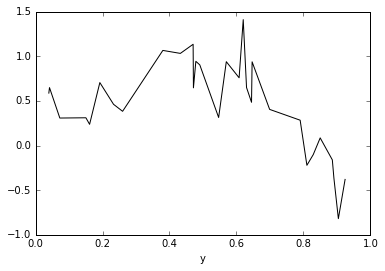

In [87]:
plot_data(data)